# Automated Christmas Dinner - A small TPOT exercise

![photo](https://static.ah.nl/static/recepten/img_006188_890x594_JPG.jpg)

In [1]:
%%capture
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

# Data from Kaggle Recipes 

https://www.kaggle.com/mikesch/finding-dinner-for-nerds

Recipes are from Epicurious, https://www.epicurious.com/

In [3]:
import os, pandas as pd
# Add asset from file system
recipes_raw = pd.read_csv("epi_r.csv")
recipes_filtered = recipes_raw.dropna()
recipes_filtered.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   
5                               The Best Blts    4.375     948.0     19.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   
5  79.0  1042.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  \
0  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
1  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
2  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
4  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
5  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   

   snack  snack week  turkey  
0    0.0         0.0     1.0  
1    0.0         0.0     0.0  
2    0.0         0.0     0.0  
4    0.0         0.0     0.0  
5    0.0         0.0     0.0  

[5 rows x 680 columns]

In [4]:
recipes_filtered.head(5)

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   
5                               The Best Blts    4.375     948.0     19.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   
5  79.0  1042.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  \
0  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
1  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
2  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
4  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
5  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   

   snack  snack week  turkey  
0    0.0         0.0     1.0  
1    0.0         0.0     0.0  
2    0.0         0.0     0.0  
4    0.0         0.0     0.0  
5    0.0         0.0     0.0  

[5 rows x 680 columns]

In [5]:
christmas_recipes = recipes_filtered[ recipes_filtered[ "winter"] > 0 ]

# Feature Pruning - the T-pot cannot fit much Tea (necessary measure)

In [6]:
NUMBER_OF_FEATUERS = 50

most_used_features = sorted( zip(recipes_filtered.columns[6:], np.sum(recipes_filtered.values[:,6:],axis=0)),key=lambda x:x[1], reverse=True)[:NUMBER_OF_FEATUERS]
most_used_features_names = [ name for name,count in most_used_features ]

christmas_recipes_subset = christmas_recipes[ list(christmas_recipes.columns[:6]) + most_used_features_names ]
christmas_recipes_subset.head(5)

title  rating  calories  protein  \
1   Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
15                   Raw Cream of Spinach Soup    4.375     382.0      5.0   
24                     Sea Salt-Roasted Pecans    3.750     279.0      3.0   
25                      Garlic Baguette Crumbs    0.000      95.0      1.0   
49                Citrus Salad with Mint Sugar    4.375     191.0      3.0   

     fat  sodium  bon appétit  peanut free  soy free  gourmet  ...  roast  \
1   23.0  1439.0          1.0          0.0       0.0      0.0  ...    0.0   
15  31.0   977.0          0.0          0.0       0.0      1.0  ...    0.0   
24  30.0   206.0          1.0          0.0       0.0      0.0  ...    0.0   
25   7.0   103.0          0.0          0.0       0.0      1.0  ...    0.0   
49   1.0     4.0          1.0          1.0       1.0      0.0  ...    0.0   

    no-cook  soup/stew  lunch  chill  sauce  potato  ginger  lemon  \
1       0.0        0.0    0.0    1.0    0.0     0.0     0.0    0.0   
15      1.0        1.0    0.0    1.0    0.0     0.0     0.0    0.0   
24      0.0        0.0    0.0    0.0    0.0     0.0     0.0    0.0   
25      1.0        0.0    0.0    0.0    0.0     0.0     0.0    0.0   
49      1.0        0.0    0.0    0.0    0.0     0.0     0.0    0.0   

    cocktail party  
1              0.0  
15             0.0  
24             1.0  
25             0.0  
49             0.0  

[5 rows x 56 columns]

## Install and Fire TPOT

Here we use `%%capture` to surpess & capture pip install output to a variable

https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture

In [7]:
!pip install tpot

    100% |████████████████████████████████| 81kB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 942kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 3.0MB/s ta 0:00:01
    100% |████████████████████████████████| 5.3MB 2.3MB/s ta 0:00:011  9% |███                             | 501kB 1.3MB/s eta 0:00:04    16% |█████▏                          | 870kB 2.9MB/s eta 0:00:02    22% |███████▏                        | 1.2MB 2.3MB/s eta 0:00:02    49% |███████████████▉                | 2.6MB 1.2MB/s eta 0:00:03    71% |███████████████████████         | 3.8MB 1.4MB/s eta 0:00:02
    100% |████████████████████████████████| 24.7MB 1.0MB/s ta 0:00:011 5% |█▉                              | 1.4MB 1.1MB/s eta 0:00:22    7% |██▍                             | 1.9MB 1.7MB/s eta 0:00:14    11% |███▉                            | 2.9MB 1.9MB/s eta 0:00:12    16% |█████▏                          | 4.0MB 506kB/s eta 0:00:41    35% |███████████▍                    | 8.8MB 1.

## TPOT Regressor to predict the rating

TPOT was primarily developed at the University of Pennsylvania, read more about TPOT including Examples at

https://epistasislab.github.io/tpot/api/

In [8]:
from tpot import TPOTRegressor

In [9]:
tpot_regressor = TPOTRegressor(verbosity=2,max_time_mins=5,n_jobs=4)

In [10]:
target="rating"

In [11]:
X = christmas_recipes_subset.drop([target,"title"], axis=1).values
y = christmas_recipes_subset[target].values

tpot_regressor.fit(X,y)


5.1823110833333335 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsRegressor(RobustScaler(input_matrix), n_neighbors=83, p=2, weights=distance)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=4, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=100,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

## TPOT can print/export the final model

In [12]:
tpot_regressor.export('tpot_dinner_output.py')

## Code can be loaded with `%load` magic

```
%load tpot_dinner_output.py
```

In [15]:
!cat tpot_dinner_output.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:-0.8093323217634072
exported_pipeline = make_pipeline(
    RobustScaler(),
    KNeighborsRegressor(n_neighbors=83, p=2, weights="distance")
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


### Example output of a TPOT run
```
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:-0.8185495071525104
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=40, p=1, weights="distance")),
    ExtraTreesRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=13, min_samples_split=8, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
```

In [19]:
from sklearn.model_selection import train_test_split

train_data = christmas_recipes_subset.drop(["title","rating"],axis=1)
test = christmas_recipes_subset["rating"]

X_train, X_valid, y_train, y_valid = train_test_split(train_data, test, test_size=0.1)

In [22]:
# %load tpot_dinner_output.py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1).values
#training_features, testing_features, training_target, testing_target = \
#            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:-0.8093323217634072

exported_pipeline = make_pipeline(
    RobustScaler(),
    KNeighborsRegressor(n_neighbors=83, p=2, weights="distance")
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X)


In [36]:
christmas_recipes_withpredictions = christmas_recipes_subset.assign(predicted_rating=results)
christmas_recipes_withpredictions["surprise"] = christmas_recipes_withpredictions.predicted_rating - christmas_recipes_withpredictions.rating
christmas_recipes_withpredictions.sort_values('surprise', ascending=False)

title  rating  calories  \
14806                                    Crimson Royale    0.000     170.0   
8984                                     Mulled Wine II    0.000     117.0   
3559                                 Chicken Bone Broth    0.000      35.0   
10196              Molasses, Rum, and Ginger Milk Punch    0.000     274.0   
17002                                           Melange    0.000      96.0   
15250                              Raisin Ginger Breads    1.250     294.0   
5230                                     Crimson Royale    0.000     170.0   
16236                         Peppermint-Cacao Cocktail    1.250     163.0   
2253                              Buttermilk Corn Bread    1.875     193.0   
5904                          Simple Vegetable Couscous    1.875     432.0   
12883                  Cumin-Crusted Lamb with Apricots    2.500     728.0   
15114      Cream of Jerusalem Artichoke and Celery Soup    2.500     311.0   
15602                              Sweet Potato Pudding    2.500     121.0   
6617                      Herbed Tomato Soup with Pasta    2.500     194.0   
8033              Coconut Souffles with Chocolate Sauce    3.125     546.0   
5710                              Lemon Chicken Cutlets    3.125     268.0   
9212                             Puerto Rican Beef Stew    3.125     502.0   
4732                   Cream of Zucchini and Anise Soup    3.125     114.0   
9011                  Sun-Dried Tomato and Olive Breads    3.125     920.0   
10755                              Cider-Glazed Carrots    3.125      87.0   
7755                                  Rosemary Focaccia    3.125     278.0   
19838                                            Eggnog    2.500     264.0   
10779    Baked Belgian Endive with Pecorino and Walnuts    3.125     166.0   
18687                       Whole-Wheat Walnut Popovers    3.125     166.0   
6250           Dried Fruit and Fresh Grapefruit Compote    3.125     232.0   
17277  Rack of Lamb with Artichokes, New Potatoes and...   3.750    1910.0   
14899     Spiced Roast Goose with Dried-Fruit Pan Sauce    3.750    2816.0   
2517                   Pork and Squash Stew with Chiles    3.750     703.0   
3401      Sausage Patties with Cranberry-Kumquat Relish    3.750     605.0   
3963   Octopus and Ceci Bean Zuppa with Escarole, Gar...   3.750     340.0   
...                                                  ...     ...       ...   
13836                         Cumin-Scented Beet Latkes    4.375     143.0   
15755                   Cheddar Garlic Stuffed Potatoes    4.375     484.0   
18602    Tagliatelle with Chestnuts, Pancetta, and Sage    4.375     561.0   
4491          Braised Duck Legs and Sautéed Duck Breast    5.000    3292.0   
16992                   Carrot with Toasted Almond Soup    4.375     288.0   
19589                                   Almond Horchata    4.375     279.0   
5969       Apple and Dried Cherry Custard Bread Pudding    5.000     543.0   
10938  Jerusalem Artichoke and Artichoke Heart Linguine    5.000     700.0   
3048                               Sweet Potato Soufflé    4.375     588.0   
10927           Michael Romano's Secret-Ingredient Soup    5.000     318.0   
1222                Cauliflower and Spinach Vinaigrette    4.375     296.0   
15763     Brown Butter Sauce with Lemon Beurre Meunière    4.375      82.0   
14672  Baked Apples with Cranberries, Raisins, and Ap...   5.000     469.0   
5323   Dark Chocolate Orange Soufflé with White Choco...   5.000     657.0   
11327  Prune Kumquat Sticky Pudding with Armagnac Tof...   5.000     939.0   
1872   Prune Kumquat Sticky Pudding with Armagnac Tof...   5.000     939.0   
14895        Smoked Duck and Walnuts with Winter Greens    5.000     152.0   
5409   Anise Cookie Baskets with Riesling Ice Cream a...   5.000     653.0   
8146                                 Pulled Corned Beef    5.000    1103.0   
17553                             Wilted Mustard Greens    5.000     445.

## Explain with Shap

In [38]:
!pip install shap

    100% |████████████████████████████████| 225kB 212kB/s ta 0:00:01
    100% |████████████████████████████████| 26.2MB 303kB/s ta 0:00:01  6% |██▏                             | 1.8MB 714kB/s eta 0:00:35    24% |████████                        | 6.6MB 343kB/s eta 0:00:58    29% |█████████▍                      | 7.7MB 661kB/s eta 0:00:29    33% |██████████▉                     | 8.9MB 191kB/s eta 0:01:31    43% |█████████████▉                  | 11.4MB 751kB/s eta 0:00:20    56% |██████████████████▏             | 14.9MB 74kB/s eta 0:02:34    66% |█████████████████████▎          | 17.4MB 802kB/s eta 0:00:11    71% |███████████████████████         | 18.8MB 386kB/s eta 0:00:20    80% |█████████████████████████▉      | 21.2MB 248kB/s eta 0:00:21    81% |██████████████████████████      | 21.2MB 579kB/s eta 0:00:09    98% |███████████████████████████████▋| 25.9MB 230kB/s eta 0:00:02    99% |███████████████████████████████▊| 26.0MB 351kB/s eta 0:00:01
    100% |███████████████████████████████

In [41]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [42]:
X_train_summary = shap.kmeans(X_train, 10)

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
explainerKNN = shap.KernelExplainer(exported_pipeline.predict,X_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(X_valid)


 60%|█████▉    | 155/259 [07:03<04:37,  2.67s/it]


100%|██████████| 259/259 [11:51<00:00,  2.74s/it]

In [55]:
j = 1
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[j], X_valid.iloc[[j]])


In [56]:
j = 2
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[j], X_valid.iloc[[j]])

In [57]:
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test, X_valid)

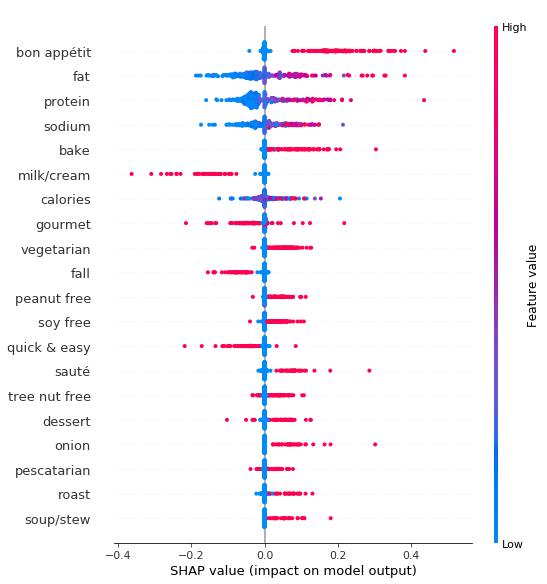

In [58]:
shap.summary_plot(shap_values_KNN_test, X_valid)

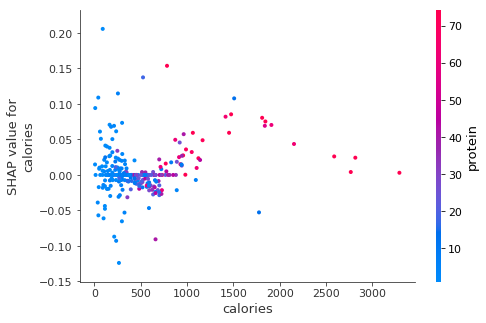

In [59]:
shap.dependence_plot("calories", shap_values_KNN_test, X_valid)

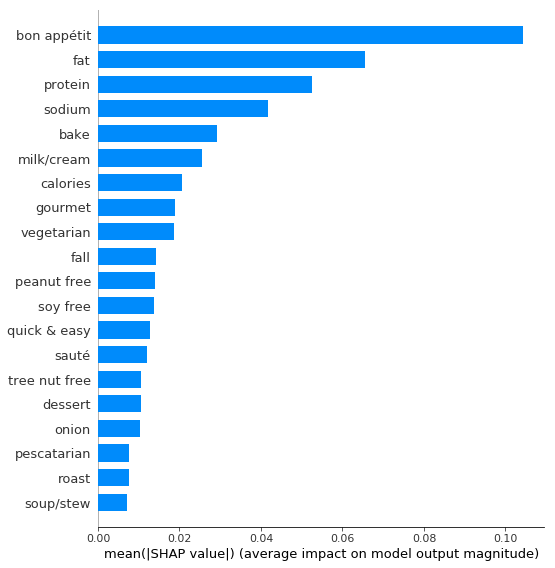

In [61]:
shap.summary_plot(shap_values_KNN_test, X_valid, plot_type="bar")